# Nome: 

# Matrícula: 

# Parte teórica

Classifique as afirmações em Verdadeiro ou Falso, justifique as afirmativas falsas

1 - Histogramas são gráficos gerados a partir de imagens, e são únicos, nunca haverá duas imagens com o mesmo histograma.

In [ ]:
#Falsa, pode existir mais de uma imagem com o mesmo histograma

2 - O código abaixo representa uma implentação correta da operação de **blending** (mistura de duas imagens): 
```python
img_blending = (0.8 * img1) + (0.3 * img2)
```

3 - O espaço de cor **CMY** pode ter um canal K extra que representa a cor **preta**, formando o espaço de cor CMY(K).

4 - O código abaixo representa um **círculo** com **110px de altura, 128px de largura e rotacionado em 64 graus**.

```svg
<circle cx='110' cy='128' r='64' fill='red'/>
```

5 - A operação lógica **OR** quando usada em imagens pode ser aplicada para adicionar uma máscara de bits à uma imagem, para isolar uma região de interesse. 

# Parte prática

## Material de apoio

### Importações

```python
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
```

### Manipulação de imagens

```python
img = Image.open('nome.extensão')
img = np.array(Image.open('nome.extensão'))
img = img[:, :, :3]
img_pil = Image.fromarray(img_np)
img.save('nome.png')
Image.fromarray(img).save('nome_arquivo.extensao')
(l,c,p) = img.shape
plt.imshow(img)
plt.imshow(img,cmap="gray")

plt.subplot(1,2,1) 
plt.imshow(img1) 
plt.subplot(1,2,2)
plt.imshow(img2)
```

### Greyscale

#### Algoritmo genérico, substituir o método escolhido
```python
img_avg = np.zeros(shape=(l, c), dtype=np.uint8)
for i in range(l):
    for j in range(c):
        r = float(img_np[i, j, 0])
        g = float(img_np[i, j, 1])
        b = float(img_np[i, j, 2])
        
        img_avg[i, j] = (aplicar método)
```

#### Métodos: 

Lightness: $\frac{max(R,G,B)+min(R,G,B)}{2}$

Average: $\frac{R+G+B}{3}$

Luminosity: $0.2126 \cdot R + 0.7152 \cdot G + 0.0722 \cdot B$

### Escalonamento com nearest neighbor

```python
ls, cs = l * sy, c * sx
mario_nn = np.zeros(shape=(ls, cs, p), dtype=np.uint8)

for i in range(ls):
    for j in range(cs):
        new_y = int(np.floor(i * (l / ls)))
        new_x = int(np.floor(j * (c / cs)))
        
        mario_nn[i, j] = mario[new_y, new_x]
```

### Reflexão / Espelhamento

#### Usando método iterativo: 

```python
mario_refl = np.zeros(shape=mario.shape, dtype=np.uint8)
for i in range(l):
    for j in range(c):
        new_x = -j
        new_y = i
        mario_refl[new_y, new_x] = mario[i, j]

plt.imshow(mario_refl)

```

#### Usando numpy:

```python
mario_refl = np.zeros(shape=mario.shape, dtype=np.uint8)
mario_refl[::-1, ::1] = mario
```

### Cisalhamento

```python
img_shear = np.zeros((int(l * (1.1 + cy)), int(c * (1.1 + cx)), p), dtype=np.uint8)
for i in range(l):
    for j in range(c):
        new_x = int(j + cx * i)
        new_y = int(cy * j + i)
        
        img_shear[new_y, new_x] = img[i, j]
```

## Operações lógicas
```python 
img_not = np.bitwise_not(img)
img_not = np.invert(img)
img_not = ~img

img_and = np.bitwise_and(img1, img2)
img_and = img1 & img2

img_or = np.bitwise_or(img1, img2)
img_or = img1 | img2

bin_xor = np.bitwise_xor(img1, img2)
bin_xor = img1 ^ img2
``` 


**1 -** Importe as bibliotecas que serão usadas

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

**2 -** Abra as imagens **dog.jpg** e **oculos.jpg**, retire o canal alpha se necessário, exiba essas imagens e mostre as dimensões (número de linhas e colunas) de cada uma.

Dimensões dog: 
(200, 200, 3)
Dimensões oculos: 
(400, 400, 3)


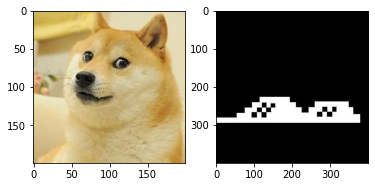

In [14]:
img_dog = np.array(Image.open("dog.jpg"))[:, :, :3]
img_oculos = np.array(Image.open("oculos.jpg"))[:, :, :3]

print("Dimensões dog: ")
print(img_dog.shape)
print("Dimensões oculos: ")
print(img_oculos.shape)

plt.subplot(1,2,1) 
plt.imshow(img_dog) 
plt.subplot(1,2,2)
plt.imshow(img_oculos)

**3 -** Crie uma função que realize o escalonamento de uma imagem. Essa função deve receber domo **parâmetros** a **imagem original**, e os parametros **SX** e **SY** (fatores do escalonamento), e **retornar** a imagem escalonada. Analise as dimensões das imagens e realize a mudança de escala na imagem **dog.jpg** a fim de deixá-la com as **mesmas dimensões** da imagem **oculos.jpg**. Exiba o resultado.

(200, 200, 3)
(400, 400, 3)


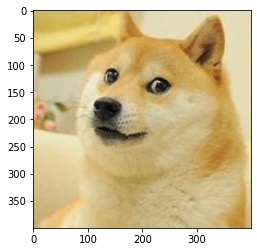

In [21]:
def escalona(img,sx,sy):
    (l,c,p) = img.shape
    ls, cs = l * sy, c * sx
    img_nn = np.zeros(shape=(ls, cs, p), dtype=np.uint8)

    for i in range(ls):
        for j in range(cs):
            new_y = int(np.floor(i * (l / ls)))
            new_x = int(np.floor(j * (c / cs)))

            img_nn[i, j] = img[new_y, new_x]
    return img_nn

dog_escalonado = escalona(img_dog,2,2)

plt.imshow(dog_escalonado)

print(img_dog.shape)
print(dog_escalonado.shape)

**4 -** Faça uma função que **espelhe** uma imagem nos **eixos X e Y** ao mesmo tempo. Essa função deve receber como **parâmetro a imagem original** e **retornar a imagem refletida** nos dois eixos. Aplique essa função na imagem **"oculos"** e mostre o resultado.

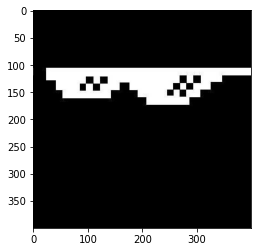

In [24]:
def refletir(img):
    (l,c,p) = img.shape
    img_refl = np.zeros(shape=img.shape, dtype=np.uint8)
    for i in range(l):
        for j in range(c):
            new_x = -j
            new_y = -i
            img_refl[new_y, new_x] = img[i, j]
            
    return img_refl

oculos_refl = refletir(img_oculos)
plt.imshow(oculos_refl)

**5 -** Aplique a operação lógica **NOT** na imagem **resultante da questão anterior** e exiba o resultado. (Não é necessário criar uma função nesta questão).

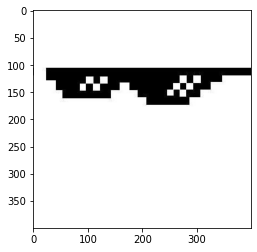

In [25]:
oculos_not = np.bitwise_not(oculos_refl)

plt.imshow(oculos_not)

**6 -** Realize a operação **AND** com as imagens resultantes das **questão 3 e 5** e mostre o resultado. (Não é necessário criar uma função nesta questão).

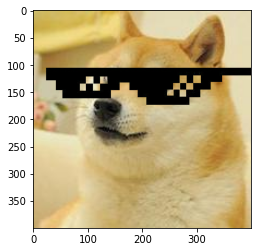

In [26]:
img_and = np.bitwise_and(dog_escalonado, oculos_not)

plt.imshow(img_and)

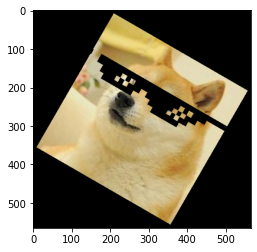

In [35]:
def rotacionar(img,alpha): 
    (l,c,p) = img.shape
    ls, cs = int(l * np.sqrt(2)), int(c * np.sqrt(2))
    img_rot = np.zeros((ls, cs, p), dtype=np.uint8)
    for i in range(ls):
        for j in range(cs):
            cx = j - (ls / 2)
            cy = i - (cs / 2)

            new_x = int( cx * np.cos(alpha) + cy * np.sin(alpha) + l / 2)
            new_y = int(-cx * np.sin(alpha) + cy * np.cos(alpha) + c / 2)

            if 0 <= new_x < c and 0 <= new_y < l:
                img_rot[i, j] = img[new_y, new_x]
    return img_rot
a = np.pi / 6 # 30°
dog_rot = rotacionar(img_and,a)

plt.imshow(dog_rot)

**7 -** Crie uma função para aplicar o cisalhamento em cima de uma imagem, que recebe como **parâmetro** uma imagem, **cx** e **cy**, sendo cx e cy os coeficientes do cisalhamento e retorne a imagem com o efeito aplicado. Aplique a função na **imagem resultante da questão anterior** com **cx=0.3** e **cy=0.2**. Mostre o resultado.

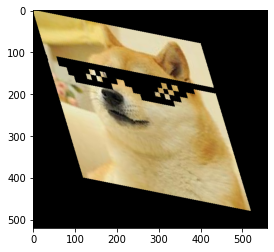

In [27]:
def cisalhamento(img,cx,cy):
    (l,c,p) = img.shape
    img_shear = np.zeros((int(l * (1.1 + cy)), int(c * (1.1 + cx)), p), dtype=np.uint8)
    for i in range(l):
        for j in range(c):
            new_x = int(j + cx * i)
            new_y = int(cy * j + i)

            img_shear[new_y, new_x] = img[i, j]
    return img_shear

img_cisalhada = cisalhamento(img_and,0.3,0.2)
plt.imshow(img_cisalhada)

**8 -** Crie uma função para **aplicar um método grayscale de sua escolha**, que receba como **parâmetro** uma **imagem** e **retorne sua versão em greyscale**. Aplique essa função na **imagem resultante da questão anterio** e mostre o resultado.

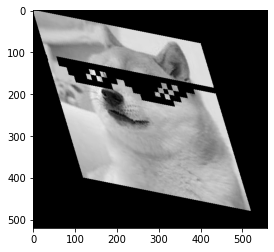

In [33]:
def grayscale(img): 
    (l,c,p) = img.shape
    img_avg = np.zeros(shape=(l, c), dtype=np.uint8)
    for i in range(l):
        for j in range(c):
            r = float(img[i, j, 0])
            g = float(img[i, j, 1])
            b = float(img[i, j, 2])

            img_avg[i, j] = (r+g+b)/3
    return img_avg

img_gray = grayscale(img_cisalhada)
plt.imshow(img_gray,cmap="gray")

**9 -** Salve a imagem da **questão anterior** no disco com o nome "resultado.jpg"

In [34]:
Image.fromarray(img_gray).save('resultado.jpg')